**Applying CNN on Computer Vision (CV) Problems:**

Convolutional Neural Networks (CNNs) are deep learning architectures designed specifically for image recognition, object detection, and classification. CNNs extract spatial hierarchies of features using convolutional layers, enabling high accuracy in computer vision tasks.

**CNN Architecture Overview:**

* Convolutional Layers – Extract features using filters/kernels.
* Activation Function (ReLU) – Introduces non-linearity.
* Pooling Layers (Max/Average Pooling) – Reduces dimensionality.
* Fully Connected Layers (FCN) – Classifies extracted features.
* Softmax Layer – Converts final outputs into class probabilities.

**Steps for Applying CNN on CV Problems:**
* Load & Preprocess Image Data (Resize, Normalize, Augment).
* Build a CNN Model (Convolution → Pooling → Fully Connected).
* Train & Evaluate the Model (Optimize using Adam/SGD).
* Make Predictions (Classify unseen images).

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr

<ipython-input-2-f8ad95b85cf9>:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir='data'

In [4]:
image_exts=['jpeg','jpg','bmp','png']

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data=tf.keras.utils.image_dataset_from_directory(r'/content/drive/MyDrive/Labs/DL/data')

Found 326 files belonging to 3 classes.


In [7]:
data_iterator = iter(data)

In [8]:
batch=data_iterator.next()

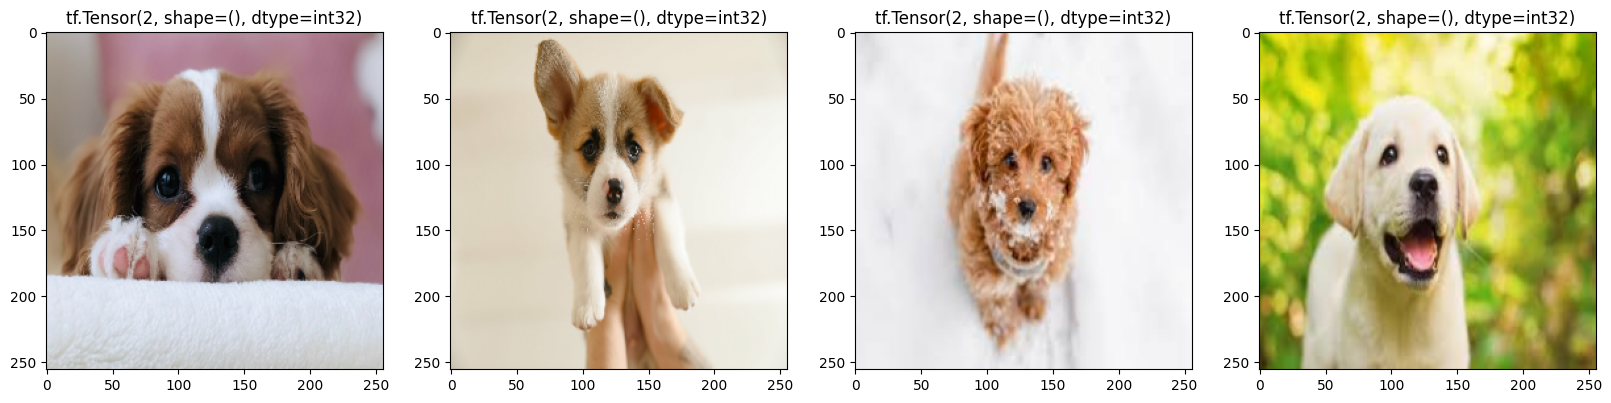

In [9]:
# Assuming `batch` is a list or tuple where batch[0] contains images and batch[1] contains titles
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.numpy().astype(int))
    # Ensure the title is a string
    title = str(batch[1][idx])
    ax[idx].title.set_text(title)
plt.show()

In [10]:
data=data.map(lambda x,y: (x/255,y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.9529412 , 0.9529412 , 0.9529412 ],
          [0.9529412 , 0.9529412 , 0.9529412 ],
          [0.9529412 , 0.9529412 , 0.9529412 ],
          ...,
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.9843137 , 0.9843137 , 0.9843137 ]],
 
         [[0.9529412 , 0.9529412 , 0.9529412 ],
          [0.9529412 , 0.9529412 , 0.9529412 ],
          [0.9529412 , 0.9529412 , 0.9529412 ],
          ...,
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.9843137 , 0.9843137 , 0.9843137 ]],
 
         [[0.9529412 , 0.9529412 , 0.9529412 ],
          [0.9529412 , 0.9529412 , 0.9529412 ],
          [0.9529412 , 0.9529412 , 0.94509804],
          ...,
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.9843137 , 0.9843137 , 0.9843137 ],
          [0.9843137 , 0.9843137 , 0.9843137 ]],
 
         ...,
 
         [[0.79607844, 0.8       , 0.78039217],
          [0.79607

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size

7

In [14]:
train=data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

In [15]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape= (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=r'/content/drive/MyDrive/Labs/DL/logs')

In [22]:
hist = model.fit(train, epochs=20,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 60s 8s/step - accuracy: 0.0427 - loss: -0.2456 - val_accuracy: 0.0000e+00 - val_loss: 4.1099
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0000e+00 - loss: 5.2302 - val_accuracy: 0.0000e+00 - val_loss: -3.3643
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 869ms/step - accuracy: 0.0000e+00 - loss: -1.4679 - val_accuracy: 0.0000e+00 - val_loss: -1.3026
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0615 - loss: -1.2658 - val_accuracy: 0.0312 - val_loss: -1.2454
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 789ms/step - accuracy: 0.0000e+00 - loss: -1.4801 - val_accuracy: 0.0000e+00 - val_loss: -1.9403
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0081 - loss: -2.9081 - val_accuracy: 0.3906 - val_loss: -1.2918
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 747ms/step - accuracy: 0.3311 - loss: -1.4788 - val_accuracy: 0.0000e+00 - val_loss: -0.7797
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 741ms/step - accuracy: 0.0000e+00 - loss: -2.5

In [23]:
from tensorflow.keras.metrics import Precision, Recall , Accuracy

In [24]:
pre=Precision()
re=Recall()
acc=Accuracy()
for batch in test.as_numpy_iterator():
    X,y =batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


In [25]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.46875, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


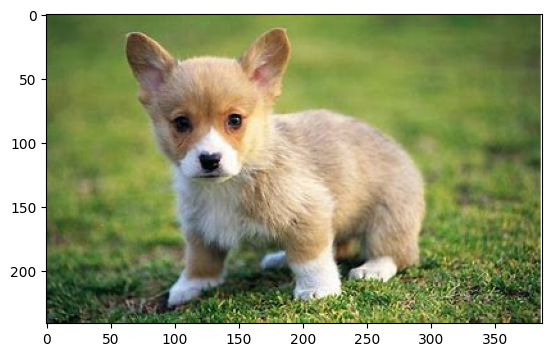

In [30]:
img=cv2.imread(r'/content/drive/MyDrive/Labs/DL/data/pup.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

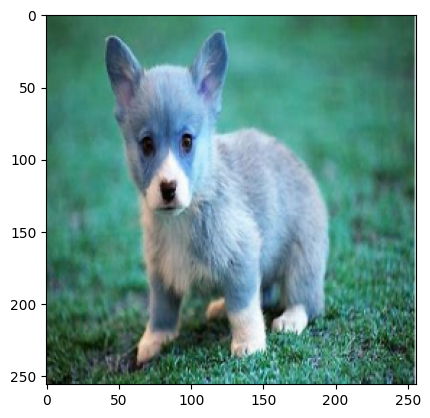

In [31]:
resize= tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
yhat=model.predict(np.expand_dims(resize/255,0))
print(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1.]]


In [33]:
if yhat > 0.5:
  print('Predicted class Puppy')
else:
  print('Predicted class Kitten')

Predicted class Puppy
